# 가위바위보 이미지 분류기 만들기

## 필요 라이브러리 불러오기

In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.7.0
60000


첫 번째 데이터 확인

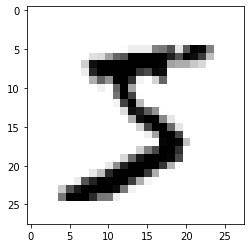

In [7]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

라벨 데이터 확인

In [9]:
print(y_train[0])

5


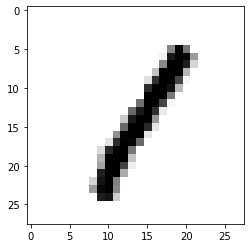

24 번째 이미지의 숫자는 바로  1 입니다.


In [11]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=23   
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

학습용 데이터 shape 확인

In [12]:
print (x_test.shape)

(10000, 28, 28)


## 데이터 전처리

In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


- 0 ~ 1 사이의 값으로 정규화를 시킴
- MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누어 줌

In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 네트워크 설계

Sequential Model 사용해 보기

In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


모델 확인

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

## 모델 학습

In [19]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


학습 데이터로 학습시키기

In [20]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1956 - accuracy: 0.9411
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0660 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0478 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0293 - accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0243 - accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 30s 16m

## 모델 테스트

In [21]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0361 - accuracy: 0.9905 - 2s/epoch - 6ms/step
test_loss: 0.03610580414533615 
test_accuracy: 0.9904999732971191


- 확실이 train 데이터보다는 정확도가 떨어진다.
- 어떤 데이터를 잘못 추론했는지 확인이 필요
- 위 코드에서 사용한 evaluate() 대신 predict()을 사용해서 확인 가능

In [22]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.3473094e-10 2.9958154e-09 1.3980109e-07 2.4179226e-07 4.4272447e-11
 3.4756538e-11 1.9738164e-16 9.9999964e-01 4.7312620e-10 1.1142333e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


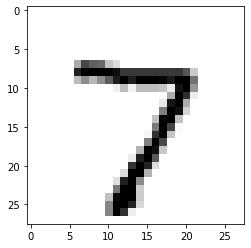

In [23]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

실제로 잘못 학습한 데이터 확인해보기

예측확률분포: [7.8089421e-08 9.3566728e-01 4.8093149e-05 5.6711264e-07 5.4519712e-03
 6.8868516e-04 2.2991213e-07 5.4562279e-06 7.7840312e-05 5.8059860e-02]
라벨: 9, 예측결과: 1


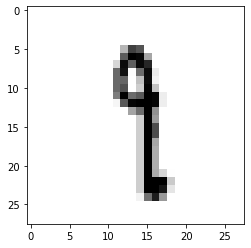

예측확률분포: [2.2408129e-07 2.3581206e-09 7.4331634e-09 1.0518111e-02 4.5908365e-08
 5.8404453e-02 6.8650130e-09 2.4007261e-09 1.7356481e-03 9.2934150e-01]
라벨: 5, 예측결과: 9


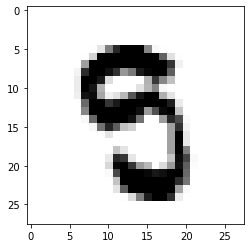

예측확률분포: [9.99677181e-01 2.15853573e-14 9.58964819e-08 1.12016536e-13
 1.03475440e-11 6.92376378e-10 2.35621684e-07 1.26021253e-12
 3.22156673e-04 3.21511038e-07]
라벨: 8, 예측결과: 0


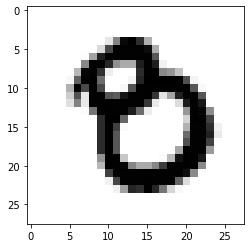

예측확률분포: [8.2120411e-13 3.8410178e-08 6.4888698e-12 1.3045678e-01 1.6079771e-09
 8.6393547e-01 2.2824012e-11 9.3510610e-10 5.5949604e-03 1.2760985e-05]
라벨: 3, 예측결과: 5


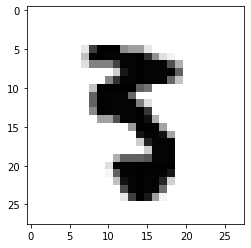

예측확률분포: [4.8205352e-06 1.9863584e-09 1.5173857e-03 9.2206025e-01 9.1495159e-11
 1.0765128e-10 5.8338972e-04 8.2512691e-10 7.5834133e-02 5.5402394e-11]
라벨: 8, 예측결과: 3


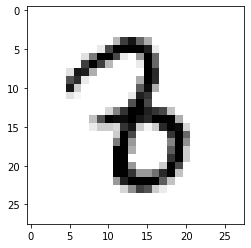

In [24]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 모델 네트워크 개선해보기

하이퍼 파라미터 변경

In [26]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

# 가위바위보 이미지 분류기 만들기

## 이미지 Resize를 위해 Pillow 불러오기

In [36]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


가위 이미지 Resize(28x28)

In [37]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/LMS/Ex.1/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


바위 이미지 Resize(28x28)

In [38]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/LMS/Ex.1/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


보 이미지 Resize(28x28)

In [39]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/LMS/Ex.1/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [40]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/LMS/Ex.1/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


이미지 확인

라벨:  0


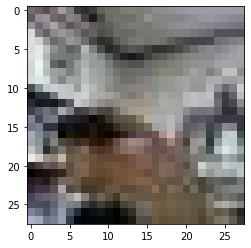

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 모델 설계

In [48]:
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [49]:
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test / 255.0
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
Before Reshape - x_train_norm shape: (300, 28, 28, 3)
Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


## 모델 학습

In [51]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=10)



Epoch 1/10
10/10 [==============================] - 1s 27ms/step - loss: 0.4435 - accuracy: 0.8633
Epoch 2/10
10/10 [==============================] - 0s 28ms/step - loss: 0.3627 - accuracy: 0.8667
Epoch 3/10
10/10 [==============================] - 0s 32ms/step - loss: 0.3273 - accuracy: 0.8667
Epoch 4/10
10/10 [==============================] - 0s 31ms/step - loss: 0.2739 - accuracy: 0.9167
Epoch 5/10
10/10 [==============================] - 0s 29ms/step - loss: 0.2720 - accuracy: 0.8967
Epoch 6/10
10/10 [==============================] - 0s 31ms/step - loss: 0.2422 - accuracy: 0.9200
Epoch 7/10
10/10 [==============================] - 0s 24ms/step - loss: 0.2589 - accuracy: 0.9133
Epoch 8/10
10/10 [==============================] - 0s 17ms/step - loss: 0.2197 - accuracy: 0.9167
Epoch 9/10
10/10 [==============================] - 0s 17ms/step - loss: 0.2102 - accuracy: 0.9267
Epoch 10/10
10/10 [==============================] - 0s 17ms/step - loss: 0.1802 - accuracy: 0.9267


## 모델 Test

In [52]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.1571 - accuracy: 0.9367 - 181ms/epoch - 18ms/step
test_loss: 0.15706084668636322 
test_accuracy: 0.9366666674613953


## 후기

약 1년 전에 진행했던 프로젝트를 새롭게 진행해 보았다.
그 당시는 머리를 쥐어 뜯을 정도로 당최 이해가 되지 않는 내용이었는데 1년 간 그래도 열심히 하긴 했는지 별 어려움 없이 프로젝트를 끝냈다.

이미지분류기는 딥러닝 컴퓨터 비전 분야에서 아주 중요하면서 기본적인 테스크이기 때문에 누구나 쉽게 접할 수 있지만 또 좋은 결과를 내기는 어려운 것 같다.

다시 이전의 프로젝트를 톺아보는 기회이니만큼 내가 놓쳤던 부분들을 다시 한번 되돌아 보면서 초석을 잘 다져나가야 할 것 같다.